In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [31]:
from keras.preprocessing.image import load_img, img_to_array
# Correct import for ImageDataGenerator with TensorFlow 2.x
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [32]:
folder_path = 'C:/Users/mahit/OneDrive/Desktop/Emotion Detection/fer2013/'
picture_size=100

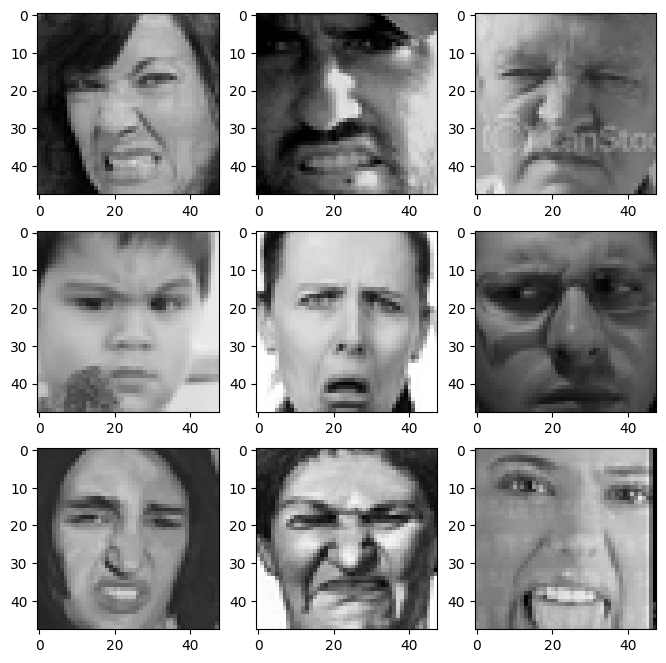

In [33]:
expression = 'disgusted'
picturesize=48
plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                os.listdir(folder_path + "train/" + expression)[i], target_size=(picturesize, picturesize))
    plt.imshow(img)   
plt.show()

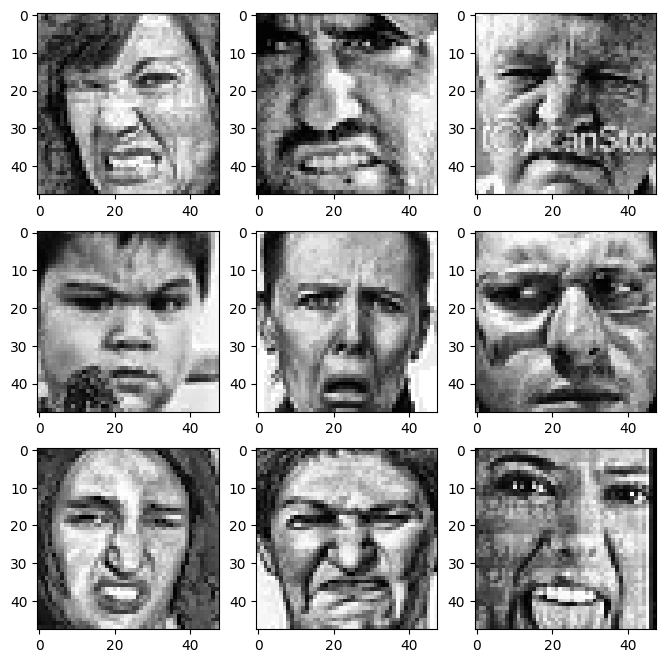

In [34]:
expression = 'disgusted_new'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train_new/"+expression+"/"+
                os.listdir(folder_path + "train_new/" + expression)[i], target_size=(picturesize, picturesize))
    plt.imshow(img)   
plt.show()

In [35]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train_new",
                                                target_size = (picture_size,picture_size),
                                                color_mode = "grayscale",
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"test_new",
                                            target_size = (picture_size,picture_size),
                                            color_mode = "grayscale",
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

Found 5847 images belonging to 7 classes.
Found 1317 images belonging to 7 classes.


In [36]:
from keras.optimizers import Adam,SGD,RMSprop
no_of_classes = 7
# Updated input shape for 100x100 images
input_shape = (100, 100, 1)

model = Sequential()

# Adjusted the input_shape in the first Conv2D layer
model.add(Conv2D(64, (3,3), padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Keeping the rest of the convolutional layers unchanged
model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Dynamically calculating the input size for the first Dense layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Output layer
model.add(Dense(no_of_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Assuming the rest of your setup for data generators and callbacks remains the same

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 100, 100, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 50, 50, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 25, 25, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 25, 25, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 25, 25, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,02

 Total params: 8,017,671 (30.58 MB)

 Trainable params: 8,013,703 (30.57 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [40]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


checkpoint = ModelCheckpoint("./model.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')


early_stopping = EarlyStopping(monitor='val_loss',
                        min_delta=0,
                        patience=3,
                        verbose=1,
                        restore_best_weights=True
                        )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                            factor=0.2,
                            patience=10,
                            verbose=1,
                            min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48
model.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.001),
            metrics=['accuracy'])



In [41]:
# Assuming train_set and test_set are DirectoryIterator objects

train_batch = next(train_set)
test_batch = next(test_set)

print("Shape of train batch input:", train_batch[0].shape)
print("Shape of train batch labels:", train_batch[1].shape)

print("Shape of test batch input:", test_batch[0].shape)
print("Shape of test batch labels:", test_batch[1].shape)


Shape of train batch input: (128, 100, 100, 1)
Shape of train batch labels: (128, 7)
Shape of test batch input: (128, 100, 100, 1)
Shape of test batch labels: (128, 7)


In [43]:
history = model.fit(x=train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=test_set.n//test_set.batch_size,
                    callbacks=callbacks_list)


Epoch 1/48
45/45 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.4450 - loss: 1.4825 - val_accuracy: 0.3000 - val_loss: 2.2458 - learning_rate: 0.0010
Epoch 2/48
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4375 - loss: 0.7829 - val_accuracy: 0.1892 - val_loss: 1.0934 - learning_rate: 0.0010
Epoch 3/48
45/45 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.5149 - loss: 1.3096 - val_accuracy: 0.3570 - val_loss: 1.9002 - learning_rate: 0.0010
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


In [11]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

AttributeError: 'Sequential' object has no attribute 'fit_generator'

In [19]:
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF
